In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
pd.set_option('display.max_columns', None)

In [44]:
cols = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
       'Flavanoids', 'Non-flavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']

In [47]:
df = pd.read_csv('wine.data', names=cols)

In [48]:
class_attribute = df['Class']
rest = pd.DataFrame(df.drop(labels=['Class'], axis=1))

In [55]:
df_new = pd.concat([rest, class_attribute], axis=1)

In [56]:
df_new.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Non-flavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [57]:
df_new.dtypes

Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Non-flavanoid phenols           float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
Class                             int64
dtype: object

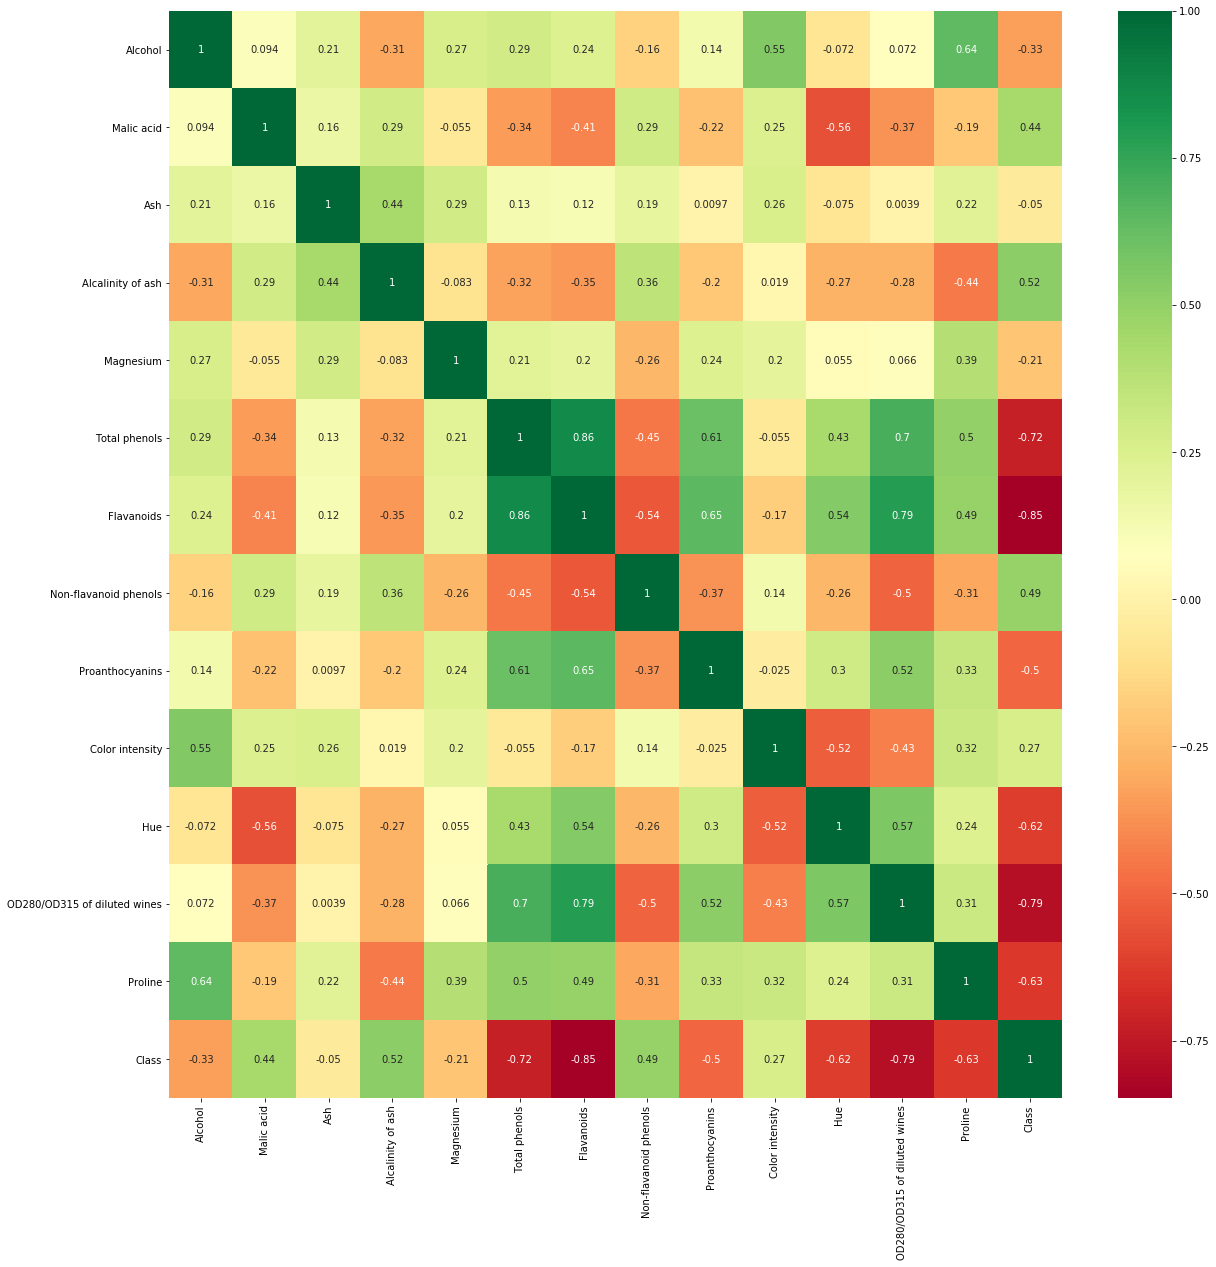

In [59]:
corr_matrix = df_new.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data=df_new[top_corr_features].corr(), annot=True, cmap='RdYlGn')

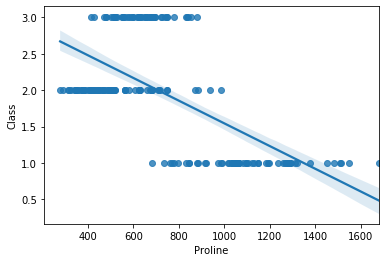

In [68]:
pl1 = sns.regplot(x='Proline', y='Class', data=df_new)

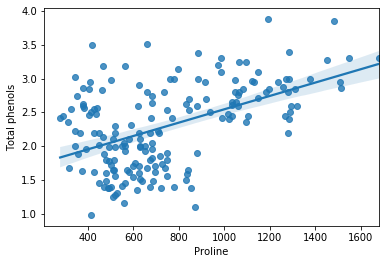

In [71]:
sns.regplot(x='Proline', y='Total phenols', data=df_new)

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [88]:
X = pd.DataFrame(df_new.drop(labels=['Class'], axis=1))
y = df_new['Class'].to_list()

In [89]:
best_features = SelectKBest(score_func=chi2, k=10)
fitted = best_features.fit(X, y)

In [92]:
df_scores = pd.DataFrame(fitted.scores_)
df_columns = pd.DataFrame(X.columns)

In [94]:
features_score = pd.concat([df_columns, df_scores], axis=1)
features_score.columns = ['Specs', 'Scores']

In [99]:
selected = features_score.nlargest(6, 'Scores')

In [104]:
features_selected = selected['Specs'].to_list()
features_selected

['Proline',
 'Color intensity',
 'Flavanoids',
 'Magnesium',
 'Alcalinity of ash',
 'Malic acid']

In [105]:
X_selected = X[features_selected]

In [72]:
from sklearn.preprocessing import StandardScaler

In [108]:
scalar = StandardScaler()
X_final = scalar.fit_transform(X_selected)

In [109]:
from sklearn.model_selection import train_test_split

In [122]:
x_train, x_test, y_train, y_test = train_test_split(X_final, y, test_size=0.1, random_state=42)

In [113]:
from sklearn.svm import SVC

In [123]:
clf = SVC()

In [127]:
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [128]:
y_pred = clf.predict(x_test)

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [132]:
print('Accuracy score: {}'.format(round(accuracy_score(y_test, y_pred), 2)))

Accuracy score: 0.94


In [133]:
print('Classification report: {}'.format(classification_report(y_test, y_pred)))

Classification report:               precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4

    accuracy                           0.94        18
   macro avg       0.96      0.95      0.95        18
weighted avg       0.95      0.94      0.94        18



In [135]:
print('Confusion metrics:')
print(confusion_matrix(y_test, y_pred))

Confusion metrics:
[[6 1 0]
 [0 7 0]
 [0 0 4]]
